# Paper Graphs
This notebook contains graphs used in the paper for the purpose of simple visualization.

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

colors = ['teal', 'firebrick', 'purple', 'green']

In [2]:
def draw_graph(graph, graph_pos=None, node_size=100, node_colors='black', edge_colors='black', edge_thickness=1, graph_name=None, ax=None):

    if graph_pos is None:
        graph_pos = nx.spring_layout(graph, seed=2)

    nx.draw(graph, graph_pos, node_size=node_size, node_color=node_colors,
                           edge_color=edge_colors, width=edge_thickness, ax=ax)

    if graph_name is not None:
        # Draw name below the graph
        ax.text(0.5, -0.05, graph_name, horizontalalignment='center'
                , verticalalignment='center', transform=ax.transAxes,
                fontsize=22)


## Simple Graphs

In [3]:
def star_graph_with_pos(n):
    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    star_pos = nx.circular_layout(G)
    
    G.add_edges_from([(0, i) for i in range(1, n + 1)])
    star_pos[0] = np.array([0, 0])
    return G, star_pos

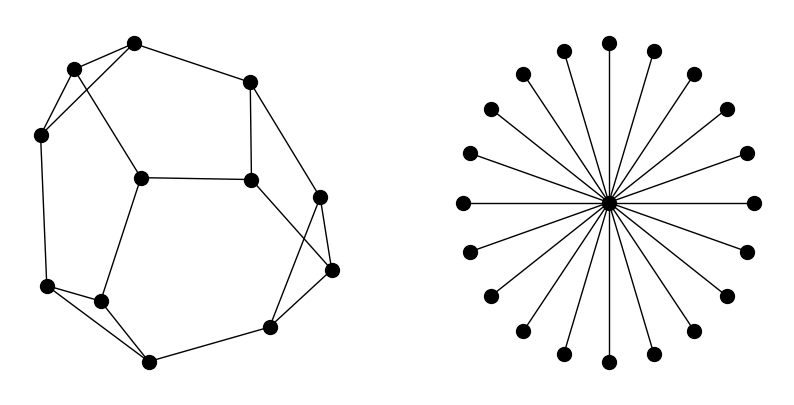

In [4]:
G1 = nx.frucht_graph()
G2, star_pos = star_graph_with_pos(20)

fix, ax = plt.subplots(1, 2, figsize=(10, 5))
draw_graph(G1, ax=ax[0])
draw_graph(G2, ax=ax[1], graph_pos=star_pos)

plt.savefig("plots/simple_graphs.pdf")
plt.show()

## Cycle Basis

In [5]:
G = nx.cycle_graph(4)
G.add_edge(0, 2)

pos = {0: np.array([0, 0]), 1: np.array([1, 0]), 2: np.array([1, 1]), 3: np.array([0, 1])}

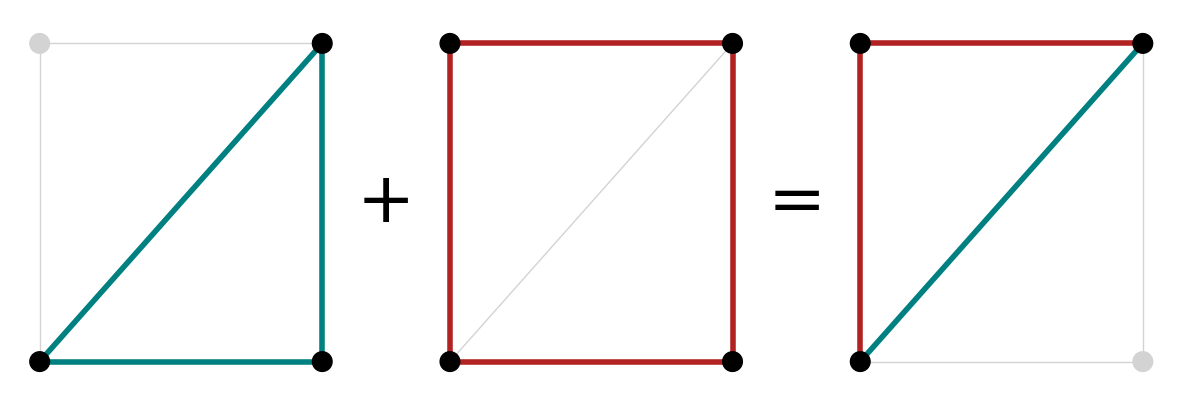

In [6]:
cycles = list(nx.simple_cycles(G))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))


def attribute_cycle(G, cycle, color):
    
    G = G.copy()
    
    # Attribute nodes with colors
    node_colors = ['lightgray' if node not in cycle else 'black' for node in G.nodes]
    for i, node in enumerate(G.nodes):
        G.nodes[node]['color'] = node_colors[i]
        
    # Attribute edges with colors       
    edge_cycle = [(u, v) for u, v in zip(cycle, cycle[1:] + cycle[:1])]
    edge_attributes = [(color, 4) if (u, v) in edge_cycle or (v, u) in edge_cycle else ('lightgray', 1) for u, v in G.edges]
    edge_colors, edge_thickness = zip(*edge_attributes)
    for i, (u, v) in enumerate(G.edges):
        G[u][v]['color'] = edge_colors[i]
        G[u][v]['thickness'] = edge_thickness[i]
    
    return G
    
    
    
G1 = attribute_cycle(G, cycles[0], colors[0])
node_colors = [node['color'] for node in G1.nodes.values()]
edge_colors = [edge['color'] for edge in G1.edges.values()]
edge_thickness = [edge['thickness'] for edge in G1.edges.values()]
draw_graph(G1, graph_pos=pos, node_size=200, node_colors=node_colors, edge_colors=edge_colors, edge_thickness=edge_thickness, ax=ax[0])


G2 = attribute_cycle(G, cycles[1], colors[1])
node_colors = [node['color'] for node in G2.nodes.values()]
edge_colors = [edge['color'] for edge in G2.edges.values()]
edge_thickness = [edge['thickness'] for edge in G2.edges.values()]
draw_graph(G2, graph_pos=pos, node_size=200, node_colors=node_colors, edge_colors=edge_colors, edge_thickness=edge_thickness, ax=ax[1])


G3 = G.copy()

for edge in G3.edges:
    if G1[edge[0]][edge[1]]['color'] == colors[0] and G2[edge[0]][edge[1]]['color'] == colors[1]:
        G3[edge[0]][edge[1]]['color'] = 'lightgray'
        G3[edge[0]][edge[1]]['thickness'] = 1
    else:
        # Choose the color of the non-gray edge
        G3[edge[0]][edge[1]]['color'] = G1[edge[0]][edge[1]]['color'] if G1[edge[0]][edge[1]]['color'] != 'lightgray' else G2[edge[0]][edge[1]]['color']
        G3[edge[0]][edge[1]]['thickness'] = 4

for node in G3.nodes:
    # Check if one of the incident edges is not gray
    if any(G3[node][neighbor]['color'] != 'lightgray' for neighbor in G3.neighbors(node)):
        G3.nodes[node]['color'] = 'black'
    else:
        G3.nodes[node]['color'] = 'lightgray'        

node_colors = [node['color'] for node in G3.nodes.values()]
edge_colors = [edge['color'] for edge in G3.edges.values()]
edge_thickness = [edge['thickness'] for edge in G3.edges.values()]
draw_graph(G3, graph_pos=pos, node_size=200, node_colors=node_colors, edge_colors=edge_colors, edge_thickness=edge_thickness, ax=ax[2])
    
   

bbox1 = ax[0].get_position()
bbox2 = ax[1].get_position()
bbox3 = ax[2].get_position()
plus_x, plus_y = (bbox1.x1 + bbox2.x0) / 2, (bbox1.y0 + bbox1.y1) / 2 
equal_x, equal_y = (bbox2.x1 + bbox3.x0) / 2, (bbox2.y0 + bbox2.y1) / 2

fig.text(plus_x, plus_y, '+', fontsize=50, ha='center', va='center')
fig.text(equal_x, equal_y, '=', fontsize=50, ha='center', va='center') 
    
plt.savefig("plots/symmetric_difference.pdf")
plt.show()

## Product Basis Cycle Count

[[(0, 0), (1, 0), (2, 0)], [(0, 0), (1, 0), (1, 1), (0, 1)], [(0, 0), (2, 0), (2, 1), (0, 1)], [(0, 1), (1, 1), (2, 1)]]


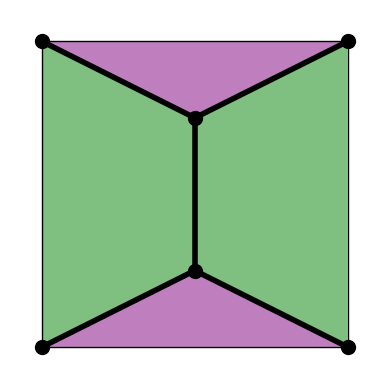

In [7]:
G = nx.cartesian_product(nx.cycle_graph(3), nx.path_graph(2))


fig, ax = plt.subplots()
pos = {
    (1, 0): (0, 0),
    (2, 0): (1, 0),
    (1, 1): (0, 1),
    (2, 1): (1, 1),
    (0, 1) : (0.5, 0.75),
    (0, 0) : (0.5, 0.25)
}

cycles = [c for c in nx.simple_cycles(G) if len(c) < 5 and any(0 == node[0] for node in c)]
print(cycles)
def get_cycle_patch(cycle, pos):
    cycle_pos = [pos[node] for node in cycle]
    poly = patches.Polygon(cycle_pos, closed=True, fill=True, edgecolor='none')
    return poly

for i, cycle in enumerate(cycles):
    patch = get_cycle_patch(cycle, pos)
    patch.set_facecolor(colors[len(cycle) - 1])
    patch.set_alpha(0.5)
    ax.add_patch(patch)

for edge in G.edges:
    G[edge[0]][edge[1]]['thickness'] = 1

st = [e for e in G.edges if any(0 == node[0] for node in e)]
for edge in st:
    G[edge[0]][edge[1]]['thickness'] = 4
edge_thickness = [G[edge[0]][edge[1]]['thickness'] for edge in G.edges]

draw_graph(G, graph_pos=pos, edge_thickness=edge_thickness, ax=ax)
#nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=15, ax=ax)
ax.set_aspect('equal')
plt.savefig("plots/pbcc.pdf")

plt.show()

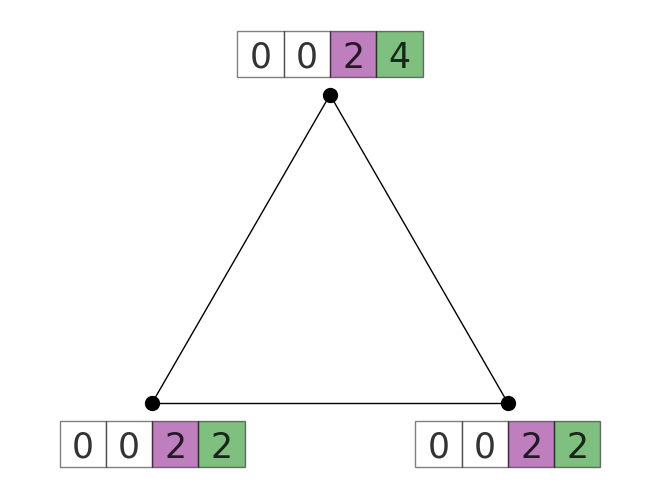

In [8]:
G = nx.cycle_graph(3)

pos = {
    0: (0, 0),
    1: (1, 0),
    2: (0.5, np.sqrt(3) / 2)
}

text_pos = {
    0: (0, -0.18),
    1: (1, -0.18),
    2: (0.5, np.sqrt(3) / 2 + 0.05)
}

draw_graph(G, graph_pos=pos)

node_values = {
    0: [0, 0, 2, 2],
    1: [0, 0, 2, 2],
    2: [0, 0, 2, 4]
}

emb_colors = ['white', 'white', 'purple', 'green']

for node, (x, y) in text_pos.items():
    # calculate the position of the separate boxes with x being the center, half the boxes are on the left, half on the right
    box_width = 0.13
    total_length = box_width * (len(node_values[node]))
    box_pos = [(x - total_length/2 + i * box_width, y) for i in range(len(node_values[node]))]
    for i, ((x, y), value) in enumerate(zip(box_pos, node_values[node])):
        # Draw the box
        rect = patches.Rectangle((x, y), box_width, box_width, linewidth=1, edgecolor='black', facecolor=emb_colors[i], alpha=0.5)
        # Draw the text
        plt.text(x + box_width / 2, y + 0.057, value, ha='center', va='center', fontsize=25, alpha=0.8, fontweight=0.5)
        plt.gca().add_patch(rect)
        
plt.axis('equal')

plt.savefig("plots/node_pbcc.pdf")
plt.show()

## WL Collision

(0, 0) [0 0]
(0, 1) [0 1]
(1, 0) [1 0]
(1, 1) [1 1]
(2, 0) [2 0]
(2, 1) [2 1]
teal firebrick


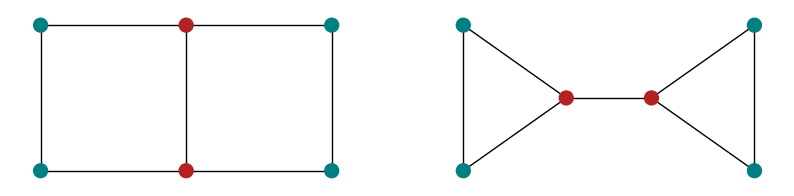

In [9]:
G1 = nx.grid_2d_graph(3, 2)
grid_pos = {node: np.array(node) for node in G1.nodes}

for node in G1.nodes:
    print(node, grid_pos[node])
G2= nx.barbell_graph(3, 0)
barbell_pos = {
    0: (0, 1),
    1: (0, 0),
    2: (np.sqrt(0.5), 0.5),
    3: (2- np.sqrt(0.5), 0.5),
    4: (2, 1),
    5: (2, 0)
}

c1 = colors[0]
c2 = colors[1]
print(c1, c2)
fix, ax = plt.subplots(1, 2, figsize=(10, 5))
draw_graph(G1, ax=ax[0], graph_pos=grid_pos, node_colors=[c1, c1, c2, c2, c1, c1])
ax[0].set_aspect('equal')
draw_graph(G2, ax=ax[1], graph_pos=barbell_pos, node_colors=[c1, c1, c2, c2, c1, c1])
ax[1].set_aspect('equal')

plt.savefig("plots/wl_collision.pdf")
plt.show()

## Visualizations of Simple Product Graphs

In [10]:
F1 = nx.cycle_graph(4)
F2 = nx.path_graph(3)

pos = nx.spring_layout(nx.cartesian_product(F1, F2), seed=2)

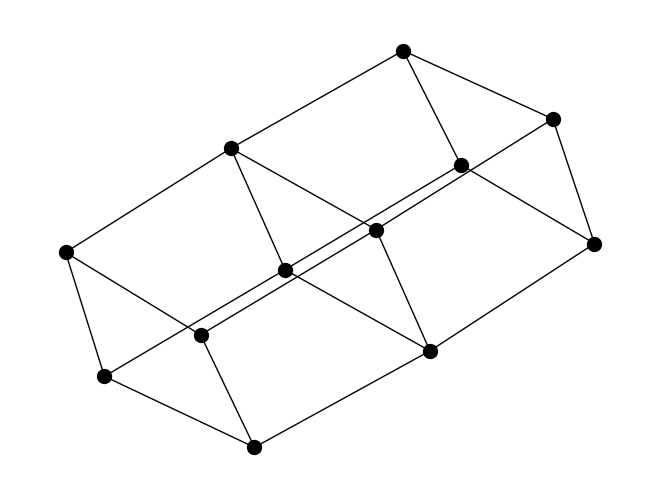

In [18]:
draw_graph(nx.cartesian_product(F1, F2), graph_pos=pos)
plt.savefig("plots/cartesian_product.pdf")

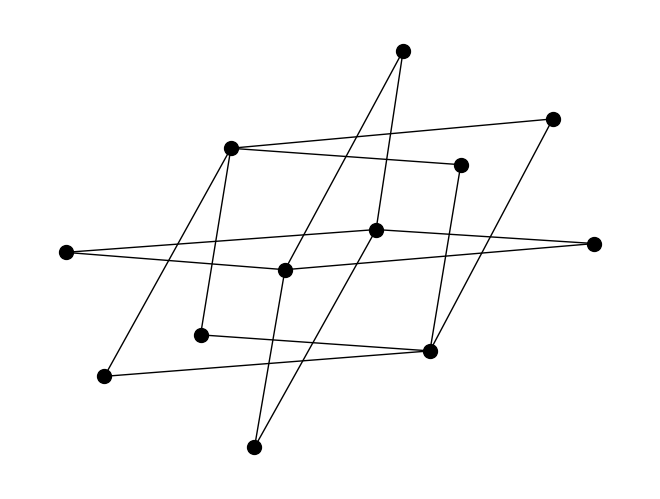

In [17]:
draw_graph(nx.tensor_product(F1, F2), graph_pos=pos)
plt.savefig("plots/direct_product.pdf")

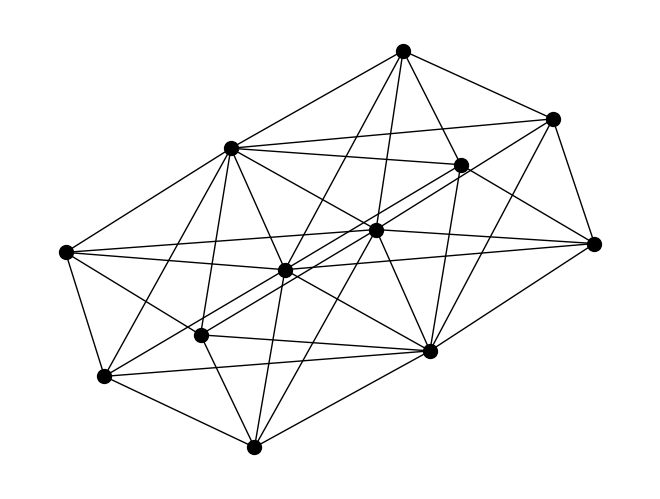

In [16]:
draw_graph(nx.strong_product(F1, F2), graph_pos=pos)
plt.savefig("plots/strong_product.pdf")

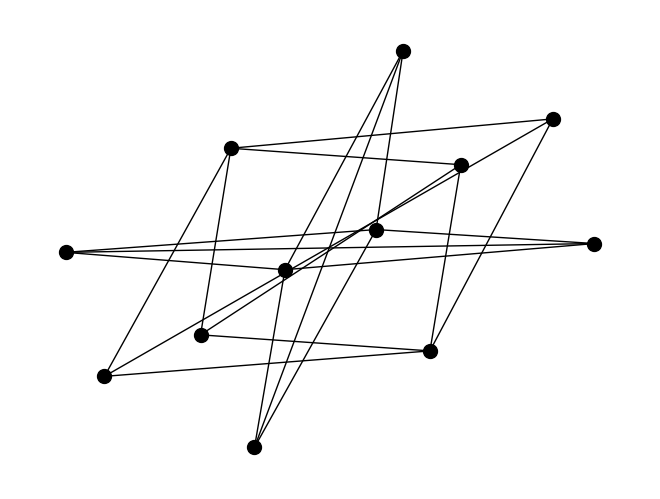

In [19]:
draw_graph(nx.modular_product(F1, F2), graph_pos=pos)
plt.savefig("plots/modular_product.pdf")